In [324]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [325]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [326]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [327]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [328]:
# reflect the tables
Base = automap_base()

In [329]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

In [330]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [331]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [332]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [333]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

In [334]:
latest_date = dt.date(2017,8,23)
print(latest_date)

2017-08-23


In [335]:
# Calculate the date one year from the last date in data set.
past_year = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print(past_year)

2016-08-22


In [336]:
# Perform a query to retrieve the data and precipitation scores
date_range = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date < latest_date).\
        filter(measurement.date > past_year).all()

In [337]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_range).set_index('date')
df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-18,NaN
2017-08-19,0.09
2017-08-20,NaN


In [338]:
# Sort the dataframe by date
df = df.sort_index()

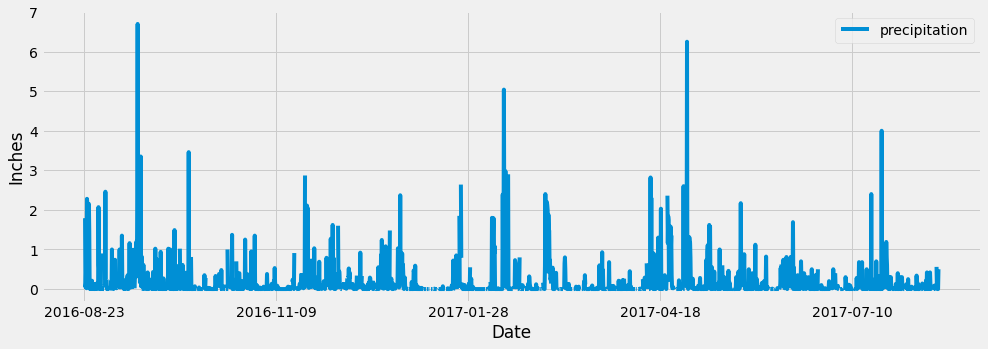

In [344]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='line',
       y='prcp',
       xlabel='Date',
       figsize=(15,5))
plt.legend(['precipitation'])
plt.ylabel('Inches')
plt.show()

In [104]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2017.000000
mean,0.177367
std,0.461568
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [106]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [284]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.tobs)).\
    group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [287]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
    group_by(measurement.station).\
    filter(measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [289]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date < latest_date).\
    filter(measurement.date > past_year).all()

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [291]:
hist_df = pd.DataFrame(session.query(measurement.station, measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date < latest_date).\
    filter(measurement.date > past_year).all())
hist_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


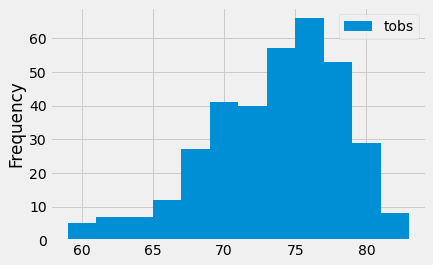

In [417]:
hist_df.tobs.plot(kind='hist',
                  bins=12,
                 legend=True)
plt.show()

# Close session

In [418]:
# Close Session
session.close()